In [53]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score,accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import datetime
import random
from mlxtend.frequent_patterns import apriori, association_rules
# Load dataset
iris_data = load_iris(as_frame=True) 
iris_df = iris_data.frame
iris_df.info()
colnames=iris_df.columns.tolist()
print(colnames)
iris_df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:

def data_cleaning(iris_df):
    # check for missing vals
    missing= iris_df.isnull().sum()
    print(f'No of missing : {missing}')
    #check for duplicate rows
    dups= iris_df.duplicated().sum()
    print(f'No of duplicate rows: {dups}')
    # missing vals change
    print(f'the no. of missing dealt with:  ') 
    # Work on missing values
    iris_df.dropna(inplace=True)
    # work on duplicate rows only delete when entire row is duplicate
    iris_df.drop_duplicates(keep='first', inplace=True)
    # confimations
    missing_n= iris_df.isnull().sum()
    print(f'No of missing : {missing_n}')
    #check for duplicate rows
    dups_n= iris_df.duplicated().sum()
    print(f'No of duplicate rows: {dups_n}')
    # missing vals change
    print(f'the no. of missing dealtith: {missing}-{missing_n}', '\n') 
    # Duplicates dealtwith
    print(f'the no. of duplicates dealtith: {dups}-{dups_n}', '\n')
    # total number of rows
    total_rows= iris_df.shape[0]
    print(f'Total no of rows: {total_rows}')

    return iris_df
# Data cleaning function call
cleaned_iris_df= data_cleaning(iris_df)


No of missing : sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
No of duplicate rows: 1
the no. of missing dealt with:  
No of missing : sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
No of duplicate rows: 0
the no. of missing dealtith: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64-sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 

the no. of duplicates dealtith: 1-0 

Total no of rows: 149


In [4]:
# Data Scaling
# check for outliers before scaling
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in seplal width
quantity_outliers, q_low, q_high = detect_outliers_iqr(cleaned_iris_df, 'sepal width (cm)')
print('Sepal width outliers', quantity_outliers.head())
# Detect outliers in petal length
price_outliers, p_low, p_high = detect_outliers_iqr(cleaned_iris_df, 'petal length (cm)')
print('Petal length outliers', price_outliers.head())
#detect outliers in petal width
width_outliers, w_low, w_high = detect_outliers_iqr(cleaned_iris_df, 'petal width (cm)')
print('Petal width outliers', width_outliers.head())

#handling outliers by capping
def cap_outliers(data, column, lower_bound, upper_bound):
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data
# Cap outliers in sepal width
cleaned_iris_df = cap_outliers(cleaned_iris_df, 'sepal width (cm)', q_low, q_high)
# Cap outliers in petal length          
cleaned_iris_df = cap_outliers(cleaned_iris_df, 'petal length (cm)', p_low, p_high)
# Cap outliers in petal width
cleaned_iris_df = cap_outliers(cleaned_iris_df, 'petal width (cm)', w_low, w_high)




# Scaling using Min-Max Scaler
df_scaled= cleaned_iris_df.copy()
scaler = MinMaxScaler()
numeric_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.head()

# one hot encoding for target variable
iris_encoded = pd.get_dummies(df_scaled, columns=['target'], prefix='species')
print('One hot encoded iris data:','\n',iris_encoded.head())







Sepal width outliers     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

    target  
15       0  
32       0  
33       0  
60       1  
Petal length outliers Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []
Petal width outliers Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target]
Index: []
One hot encoded iris data: 
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475         

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            0.428784          0.503188           0.465931   
std             0.230792          0.212913           0.299626   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.375000           0.101695   
50%             0.416667          0.475000           0.559322   
75%             0.583333          0.625000           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        149.000000  
mean           0.456096  
std            0.317759  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


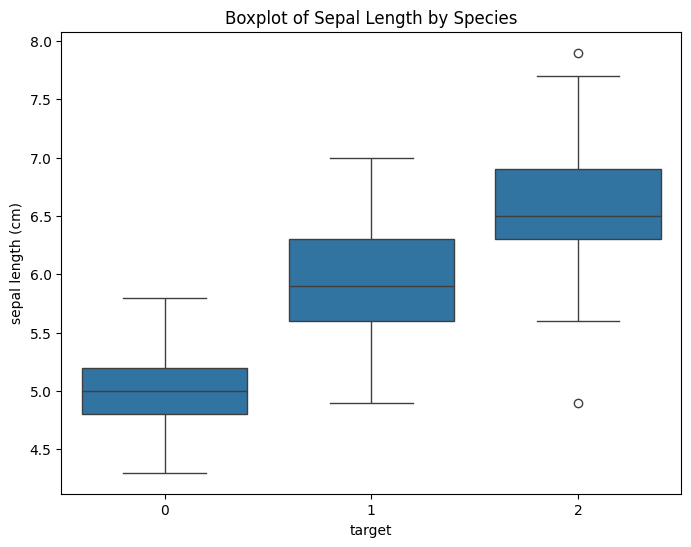

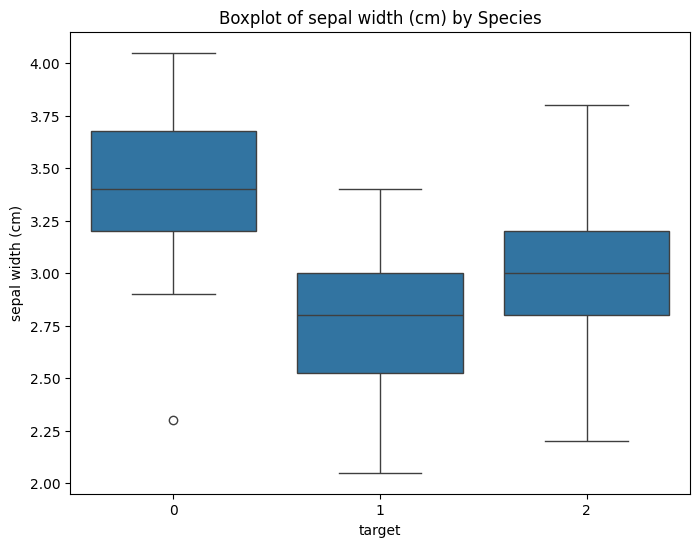

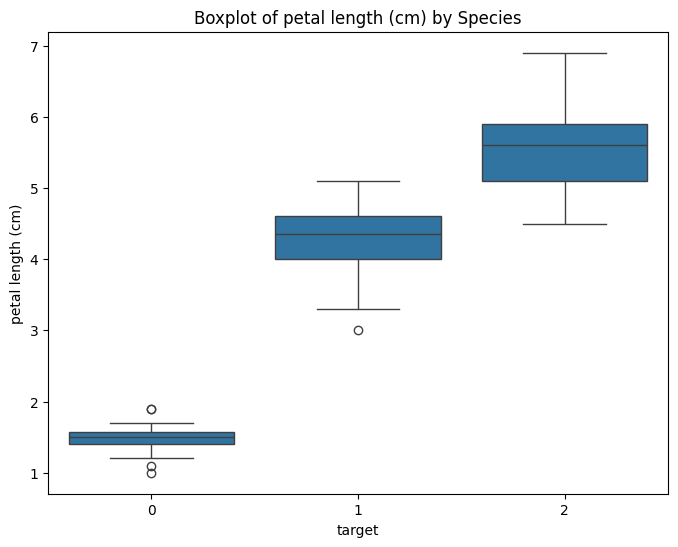

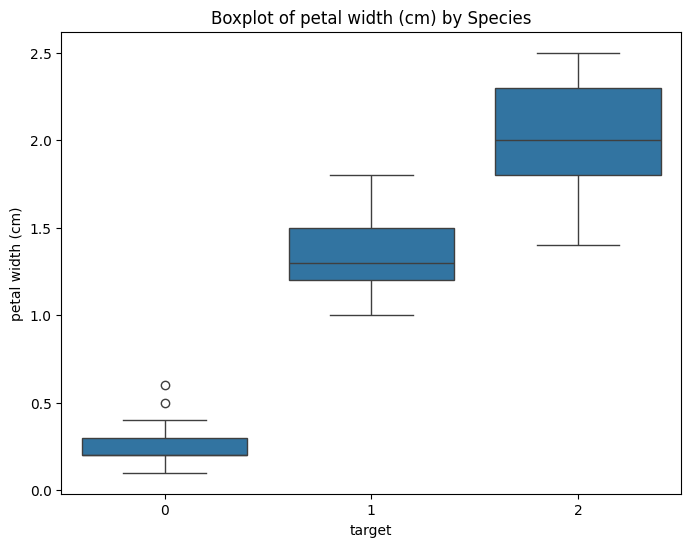

Text(0.5, 1.0, 'Correlation Heatmap')

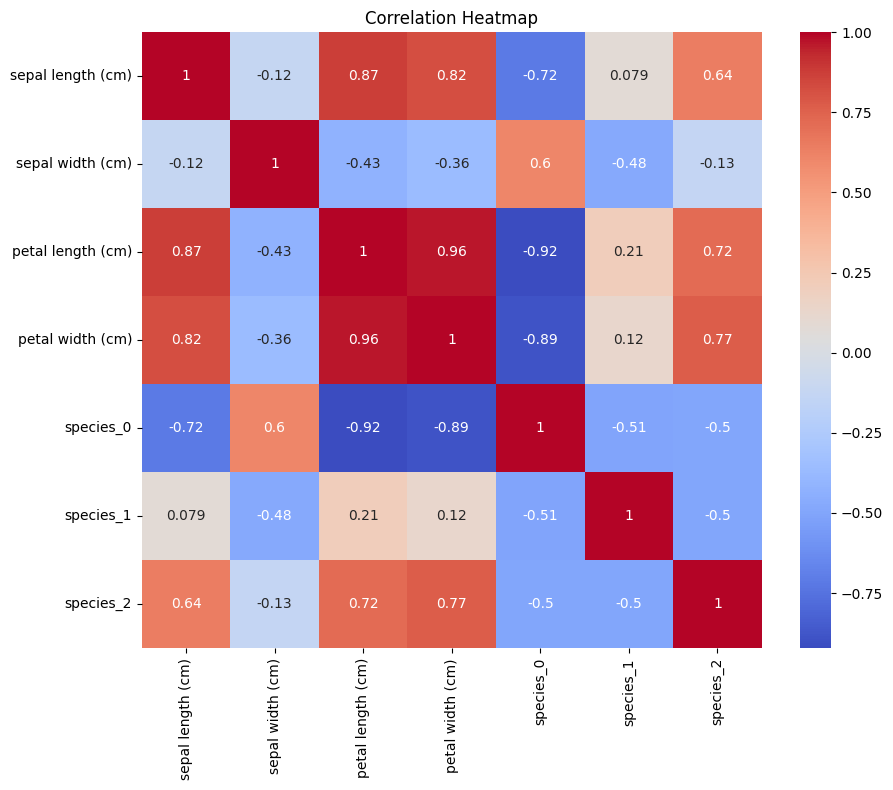

In [5]:
# Exploration
i_describe=iris_encoded.describe()
print(i_describe)

# visualisations
# boxplot of species vs sepal length
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='sepal length (cm)', data=cleaned_iris_df)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

# boxplot of species vs sepal width (cm)
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='sepal width (cm)', data=cleaned_iris_df)
plt.title('Boxplot of sepal width (cm) by Species')
plt.show()

# boxplot of species vs petal length (cm
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='petal length (cm)', data=cleaned_iris_df)
plt.title('Boxplot of petal length (cm) by Species')
plt.show()

# boxplot of species vs petal width (cm)
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='petal width (cm)', data=cleaned_iris_df)
plt.title('Boxplot of petal width (cm) by Species')
plt.show()


# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(iris_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### Outliers
According to the outlier detection earlier there were no outliers. The boxplot however identifies these possible outliers:
chart 1- target 2 has 2 outliers one at abouy 7.75 cm and one at aroung 5 cm
chart 2- only one outlier in target 0 
chart 3- there are numerous outliers especially on the lower side of target 0
chart 4- Only 2 outlires for target 0

ARI score for k=3: 0.6577
The clustering shows some correlation but still room for better clustering 



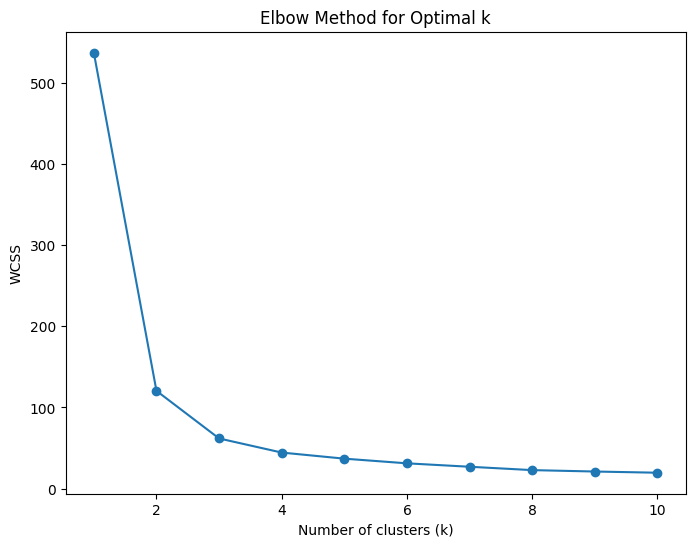

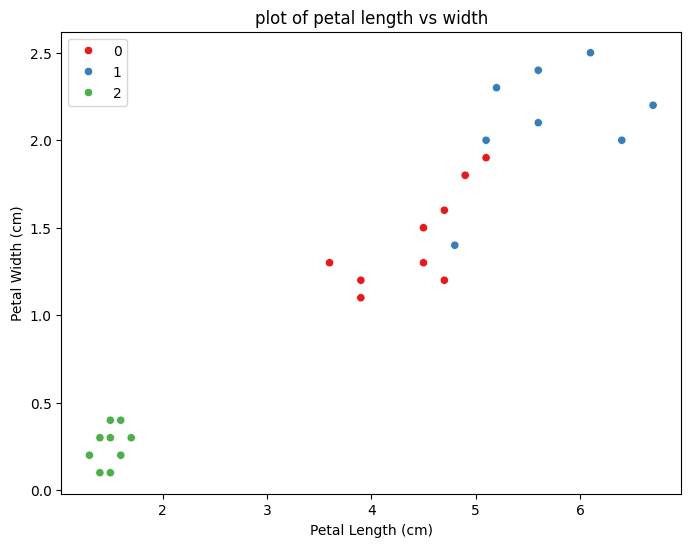

Text(0.5, 0, 'Sepal Length (cm)')

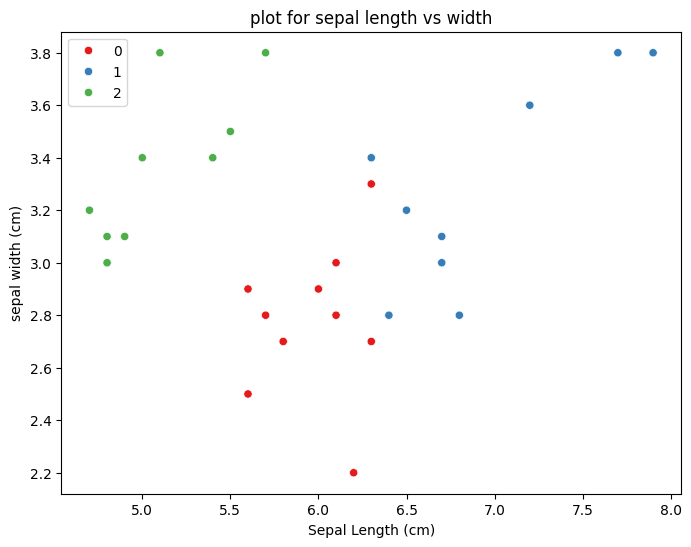

In [29]:
# split data into test and train sets
X = cleaned_iris_df.drop(columns=['target'])
y = cleaned_iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# k means clustering k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)

#Fit the model on the FEATURES ONLY
kmeans_final.fit(X_train)

# Predict cluster labels for test set
predicted_clusters = kmeans_final.predict(X_test)

# 4. Calculate the Adjusted Rand Index( metric for compairing clustering result)
ari_score = adjusted_rand_score(y_test, predicted_clusters)
print(f"ARI score for k=3: {ari_score:.4f}")

if ari_score > 0.8:
    print("The clustering is highly accurate")
else:
    print("The clustering shows some correlation but still room for better clustering",'\n')

   
# # k means clustering k=2
# kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
# kmeans_final.fit(X_train)
# predicted_clusters = kmeans_final.predict(X_test)
# ari_score = adjusted_rand_score(y_test, predicted_clusters)
# print(f"ARI score for k=2 : {ari_score:.4f}")
# if ari_score > 0.8:
#     print("The clustering is highly accurate")
# else:
#     print("The clustering shows some correlation but still room for better clustering",'\n')

# k means clustering k=4
# kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
# kmeans_final.fit(X_train)
# predicted_clusters = kmeans_final.predict(X_test)
# ari_score = adjusted_rand_score(y_test, predicted_clusters)
# print(f"ARI score for k=4: {ari_score:.4f}")
# if ari_score > 0.8:
#     print("The clustering is highly accurate")
# else:
#     print("The clustering shows some correlation but still room for better clustering",'\n')

# For better visualisation use elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()
plt.show()

# scatter plot of petal length vs width, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['petal length (cm)'], y=X_test['petal width (cm)'], hue=predicted_clusters, palette='Set1')
plt.title('plot of petal length vs width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# scatter plot of sepal length vs width, colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], hue=predicted_clusters, palette='Set1')
plt.title('plot for sepal length vs width')
plt.xlabel('Sepal Length (cm)')
# plt.ylabel('Sepal Width (cm)')
# plt.show()
   

### Analysis

ari score for 3 clusters is  0.6577.
ari score for 2 clusters is  0.5581.
ari score for 4 clusters is  0.6147.
According to the ari scores 3 seems to be the best fit for the targets here. However it's important to note that this score is not high enough for high accuracy.
This is seen with some of the plots such as plot for sepal length aganist width where there is alot of overlap between target 0 and 1,
3 clusters has ahown to be adequate as well with the almost perfect clustering in petal length vs width with only slight overlap in 0 and 1.
In the elbow plot there is a steap drop from 1-2 - The addition of a clusterbrings about distinct grouping
2-4 - The chart slows indicating that the addition of clusters still captures differences however not as much as before
5-10- the chart slows to almost a straight line  here additional clusters don't bring about much more differentiation




In [49]:
# decision tree classifier model
from sklearn.tree import DecisionTreeClassifier


X_scaled = df_scaled[numeric_cols] 
y = df_scaled['target']            

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision Tree Accuracy: 1.0
Decision Tree Precision : 1.0
Decision Tree Recall : 1.0
Decision Tree F1-Score : 1.0


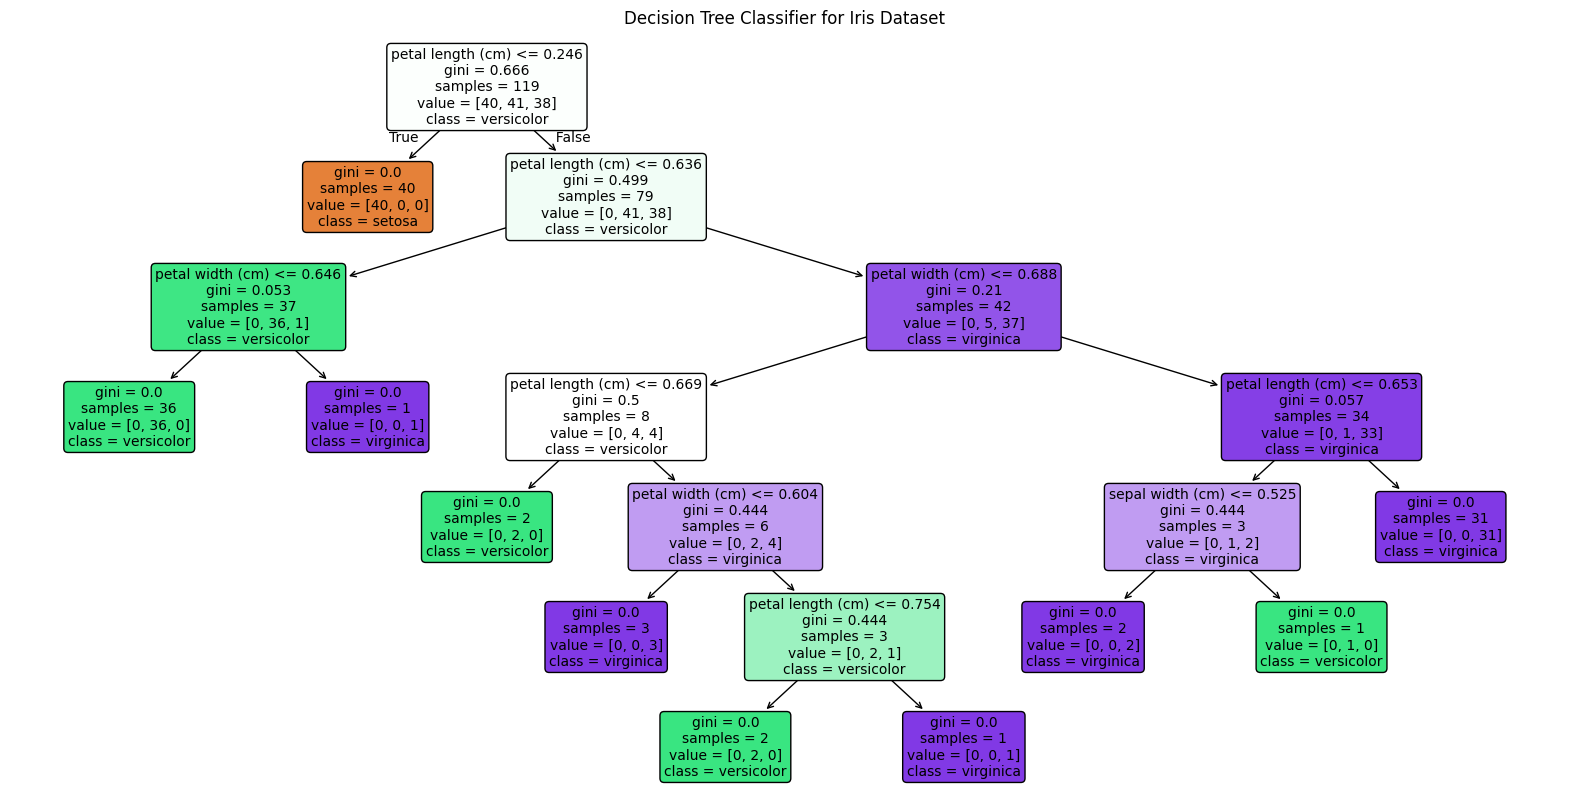


TASK 2: K-Nearest Neighbors (K=5) Classifier
KNN Accuracy: 1.0000
KNN F1-Score (Macro): 1.0000

--- Final Model Comparison ---
1. Both models performed equally well with an Accuracy of 1.0000.
   Reason: For a simple, well-behaved dataset like Iris, both fundamentally different approaches often yield comparable results.


In [ ]:
from sklearn.tree import plot_tree
# 2. Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# 3. Compute metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Precision : {precision_dt}")
print(f"Decision Tree Recall : {recall_dt}")
print(f"Decision Tree F1-Score : {f1_dt}")


# 4. Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X_train.columns.tolist(),
    class_names=iris_data.target_names, # Use the actual species names
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier for Iris Dataset")
plt.show() 





In [51]:
# KNN Classifier
# Train KNN Classifier k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# 3Compute metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN F1-Score (Macro): {f1_knn:.4f}")


# comparison

if accuracy_dt > accuracy_knn:
    print(f" Decision Tree is the better classifier for this dataset.")
    print("  Reason: There are true class boundaries (splits based on petal width/length)  that are easily found by the binary splitting of the tree.")
elif accuracy_knn > accuracy_dt:
    print(f" K-Nearest Neighbors (K=5) is the better classifier for this dataset.")
    print("   Reason: Since KNN relies purely on the distance between data points, the Min-Max Scaling performed earlier helped standardize the feature space, allowing KNN to find accurate boundaries defined by local neighborhood structure.")
else:
    print(f" Both models performed equally well.")
    print("  Reason: Our a simple dataset, doesn't offer too much chaos enabling both to prform equally well.")


KNN Accuracy: 1.0000
KNN F1-Score (Macro): 1.0000
 Both models performed equally well.
  Reason: Our a simple dataset, doesn't offer too much chaos enabling both to prform equally well.


In [55]:
# Generate  Data (using Python Lists)
# Define items
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'coffee', 
         'sugar', 'tea', 'juice', 'cereal', 'yogurt', 'soda', 'chips', 'wine']

# Initialize the list of transactions (list of lists)
transactions = []
random.seed(42) 

# Generate 50 transactions
for i in range(50):
    # Base items: Random choice of 3 to 8 unique items
    basket_size = random.randint(2, 7)
    basket = random.sample(items, basket_size)
    
    # Introduce strong co-occurrence patterns:
    # Pattern 1: If 'diapers' is in the basket, 'beer' is included 80% of the time.
    if 'diapers' in basket and random.random() < 0.8: 
        basket.append('beer')
        
    # Pattern 2: 'coffee' often comes with 'sugar' (70% of the time).
    if 'coffee' in basket and random.random() < 0.7:
        basket.append('sugar')

    # Add the transaction (removing any duplicates that patterns might have introduced)
    transactions.append(list(set(basket)))

# confirmation
print(f"No transactions {len(transactions)} ")


No transactions 50 


    beer  bread  cereal  cheese  chips  coffee  diapers   eggs  juice   milk  \
0   True   True    True   False  False   False     True   True  False   True   
1  False   True   False   False  False    True    False  False   True   True   
2  False  False   False   False  False   False    False  False   True   True   
3   True  False    True   False   True    True     True  False  False  False   
4  False  False   False   False  False   False    False  False  False  False   

    soda  sugar    tea   wine  yogurt  
0  False  False  False  False    True  
1  False   True   True   True    True  
2  False  False   True  False   False  
3  False   True   True  False    True  
4   True  False  False   True   False  
  antecedents consequents  support  confidence      lift
2     (sugar)    (coffee)     0.30    0.714286  2.100840
3    (coffee)     (sugar)     0.30    0.882353  2.100840
1   (diapers)      (beer)     0.32    0.842105  1.913876
0      (beer)   (diapers)     0.32    0.727273  1.9

C:\Users\HP\AppData\Local\Temp\ipykernel_17096\429763987.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=top_itemsets.index.astype(str), data=top_itemsets, palette='viridis')


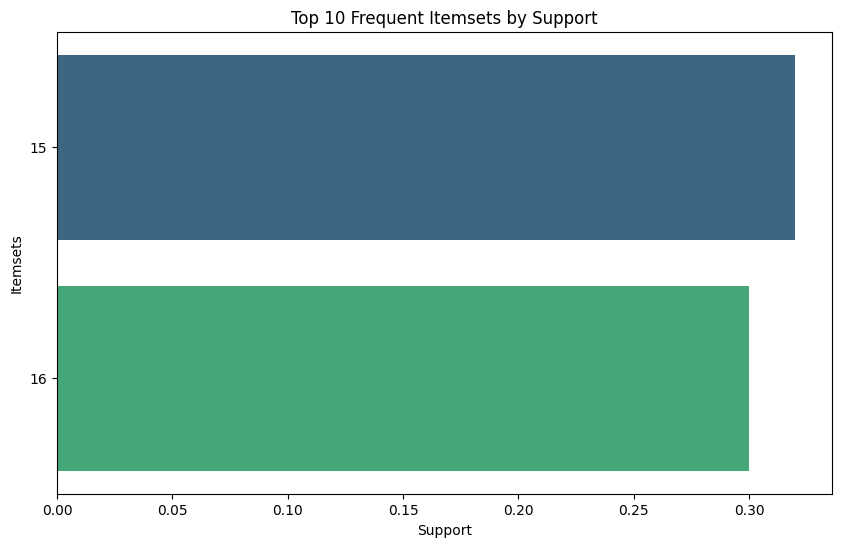

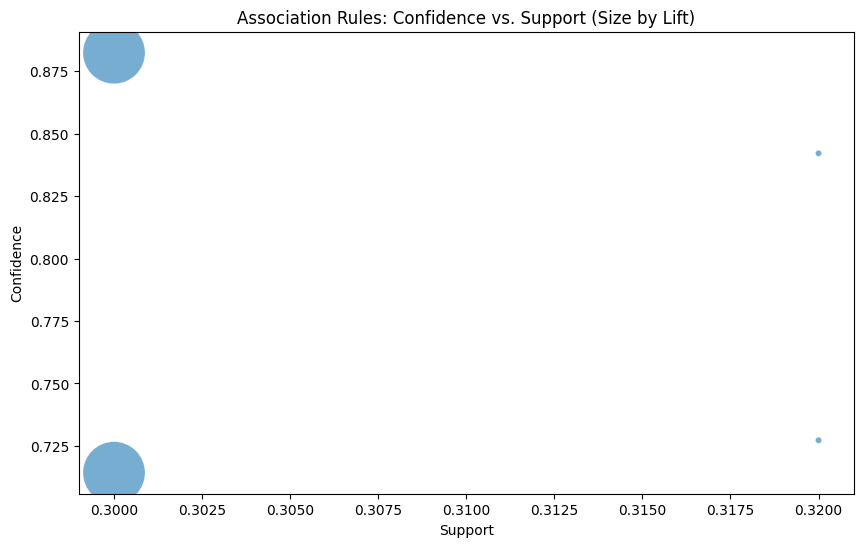

In [ ]:
#  One-Hot Encoding

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Already dense; no need to convert
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print(df_transactions.head())


# Apriori
min_support_threshold = 0.2
frequent_itemsets = apriori(df_transactions, min_support=min_support_threshold, use_colnames=True )
frequent_itemsets.head()


# Association Rules (min_confidence=0.5)
min_confidence_threshold = 0.5
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)
# Sort by lift and display top 5 rules
rules_sorted = rules.sort_values(by='lift', ascending=False)
top_5_rules = rules_sorted.head(5)

print(top_5_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


# visualisation




In [ ]:
# 5. Analyze One Rule's Implications
# ----------------------------------------------------
print("\n--- Rule Analysis ---")

# Analyze the top rule (which is likely related to the 'diapers'/'beer' or 'coffee'/'sugar' pattern)
if not top_5_rules.empty:
    analysis_rule = top_5_rules.iloc[0]
    
    antecedent = set(analysis_rule['antecedents'])
    consequent = set(analysis_rule['consequents'])
    confidence = analysis_rule['confidence']
    lift = analysis_rule['lift']
    
    print(f"Analyzed Rule: {antecedent} -> {consequent}")
    print(f"Confidence: {confidence:.2f}, Lift: {lift:.2f}")

    print("\nImplication for Retail Recommendations:")
    print(f"This rule suggests that customers who purchase {antecedent} also purchase {consequent} with a high confidence of {confidence*100:.1f}%.")
    
    if lift > 1:
        print(f"Since the Lift ({lift:.2f}) is greater than 1.0, this co-occurrence is highly significant (they are bought together far more often than would be expected by chance).")
        print("Retail Action: This pattern is a great opportunity for **cross-selling** by placing these items closer together in the store layout or offering targeted online promotions to customers who put the antecedent item into their basket.")
    else:
        print("The Lift is less than 1.0, suggesting these items are substituted or bought independently.")
else:
    print("No rules were found that met the minimum support and confidence thresholds.")